In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

<function matplotlib.pyplot.show(close=None, block=None)>

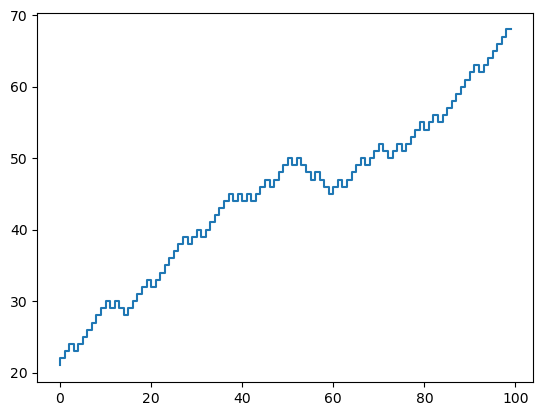

In [9]:
n=100
x=20
L=[]
a=[1,-1]
for i in range(n):
   b =  2*sp.stats.bernoulli.rvs(p=0.75) - 1
   x+=b
   L.append(x)
   if x == 0 or x==100:
    break

plt.step(np.arange(len(L)),L)
plt.show


[19, 20, 19, 18, 17, 16, 15, 16, 15, 14, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


<function matplotlib.pyplot.show(close=None, block=None)>

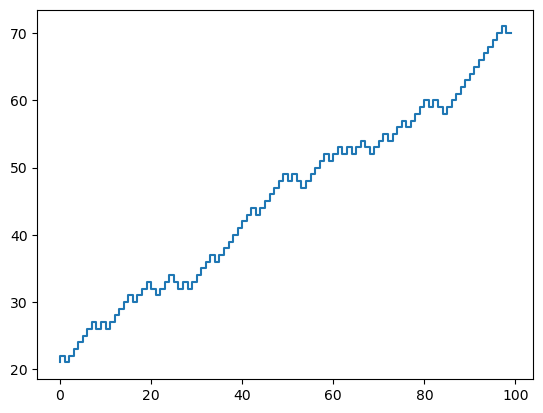

In [20]:
class PlayCards:
    def __init__(self,p,i,T):

        # xac suat
        self.p=p
        # Tien von
        self.money=i
        # so luot choi
        self.play_count=T
    
    def game(self):
        l=[]
        x=self.money
        for i in range(self.play_count):
            b= 2*sp.stats.bernoulli.rvs(self.p)-1
            x=x+b
            l.append(x)
            if x==0 or i==(self.play_count-1):
                break
        return l

trochoi=PlayCards(0.75,20,100)
L=trochoi.game()
print (a)
plt.step(np.arange(len(L)),L)
plt.show
        



